# Random Forest training 
- Author: Mako Shibata (s2471259@ed.ac.uk) 
- Date: 27/06/2024
- Aim: Understanding the application of Random Forest method 
- Tutorial: https://lost-stats.github.io/Machine_Learning/random_forest.html

Definition of RF 

- Applicable to classification and regression 
- Regression: takes the average of outputs by different trees 
- Each decision tree is independent. It only considers a random subset of predictor variables when making each split for each tree. 
- Each node is a condition of a single feature. 
- More trees, better accuracy but risks overfitting.

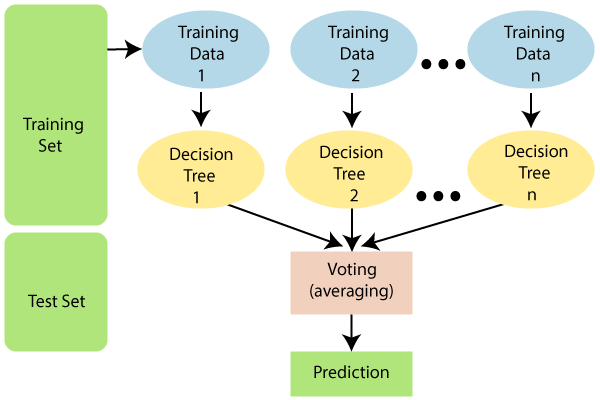

Image: Visualised diagram of Random Forest method


Photo Credit: https://www.javatpoint.com/machine-learning-random-forest-algorithm


In [26]:
# import packages 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # for regression, RandomForestRegressor
from sklearn.metrics import accuracy_score

In [27]:
# read data 

iris = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")

iris.head()

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [28]:
# prepare data 

X = iris[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
y = iris[["Species"]]


# split data into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                   random_state = 1996 # to ensure the same randomisation is used 
                                                   # each time the code runs, resulting in the same splits of the data.
                                                   )

unique_species = iris["Species"].unique()
print(unique_species)

['setosa' 'versicolor' 'virginica']


Research question:

Can we classify three bird species, setosa, versicolor, and virginica, 
based on sepal length, sepal width, petal length, and petal width? 


In [29]:
# Creating model using random forest 

model = RandomForestClassifier(max_depth = 2)
model.fit(X_train, y_train)

/Users/Owner/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=2)

In [30]:
# predict values for test data
y_pred = model.predict(X_test)

# Evaluate model prediction
print(f"Accuracy is {accuracy_score(y_pred, y_test)*100:.2f} %")

Accuracy is 93.33 %


# Research questions applicable 
1. Classification Questions 
- Can we accurately predict the measurement m

# Feature Contribution Analysis 
1. Mean Decrease in Impurity (MDI) 
- Measures the importance of feature by the total reduction in the criterion. 
- Fast, directly computed during the training

2. Mean Decrease in Accuracy (MDA) 
- Measures changes in the model's accuracy when the values of a particular feature are randomly shuffled. 
- A significant decrease in accuracy indicates a high performance of the feature. 
- Reliable 
- Heavier load as re-evaluation required. 

3. SHAP (SHapley Additive exPlanations) Values 
- game-theoretic approach to explain the output of machine learning models. 
- provides more individual contributions. 

In [34]:
# Example contribution analysis (MDI) 
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns

importance_model = pd.DataFrame({
    'feature': feature_names, 
    'importance': importances
}).sort_values(by='importance', ascending=False)

print(importance_model)

        feature  importance
2  Petal.Length    0.450597
3   Petal.Width    0.415872
0  Sepal.Length    0.119146
1   Sepal.Width    0.014385


<function matplotlib.pyplot.show(close=None, block=None)>

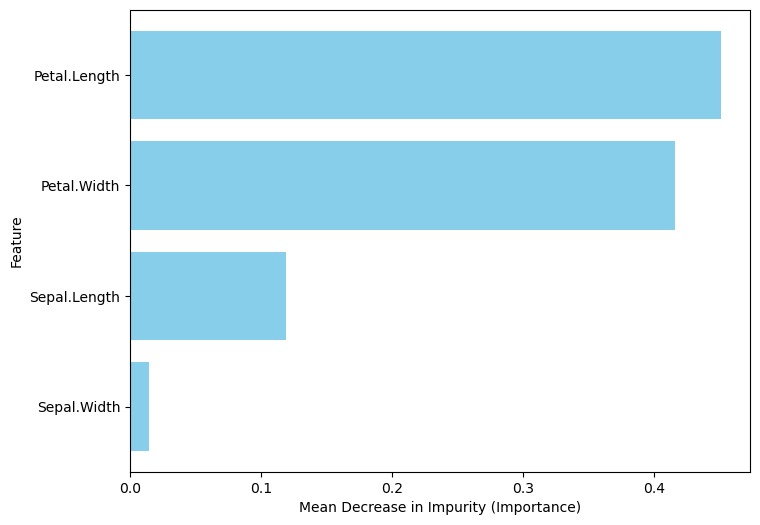

In [36]:
# plot the feature importances 

plt.figure(figsize=(8, 6))
plt.barh(importance_model["feature"], importance_model["importance"], color="skyblue")
plt.xlabel('Mean Decrease in Impurity (Importance)')
plt.ylabel('Feature')
plt.gca().invert_yaxis() # invert y axis to show the most significant feature on the top
plt.show